In [1]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import json
from shapely.geometry import Point

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'

In [3]:
params = {'$where' : "incident_reported between '2021-03-30T00:00:00.000' and '2021-09-30T00:00:00.000'" 
}

In [4]:
response = requests.get(endpoint, params)

In [5]:
response

<Response [200]>

In [6]:
res = response.json()

In [7]:
#print(response.text[:10000])

In [8]:
from io import StringIO

In [9]:
incd = pd.read_json(StringIO(response.text))

In [10]:
incd.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_number,domestic_related,victim_type,victim_description,mapped_location,victim_gender,victim_race,victim_ethnicity,victim_county_resident,zip_code
0,2021017901611,20210179016,D,DISPATCHED,O,OPEN,Open,2021-03-29T02:13:00.000,2021-03-30T00:07:00.000,DEMONBREUN ST,...,1,False,B,BUSINESS,"{'type': 'Point', 'coordinates': [-86.77, 36.16]}",NaN,NaN,NaN,NaN,NaN
1,2021017898011,20210178980,D,DISPATCHED,O,OPEN,Open,2021-03-29T14:00:00.000,2021-03-30T00:25:00.000,S 5TH ST,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.76, 36.17]}",M,B,Non-Hispanic,RESIDENT,NaN
2,2021017898022,20210178980,D,DISPATCHED,O,OPEN,Open,2021-03-29T14:00:00.000,2021-03-30T00:25:00.000,S 5TH ST,...,2,False,S,SOCIETY,"{'type': 'Point', 'coordinates': [-86.76, 36.17]}",NaN,NaN,NaN,NaN,NaN
3,2021017907211,20210179072,D,DISPATCHED,U,UNFOUNDED,Closed,2021-03-29T23:40:00.000,2021-03-30T00:30:00.000,4413 4413,...,1,True,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.84, 36.1...",M,B,Non-Hispanic,RESIDENT,37209.0
4,2021017868611,20210178686,D,DISPATCHED,O,OPEN,Open,2021-02-01T00:00:00.000,2021-03-30T00:31:00.000,FREEMAN LN,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.67, 36.25]}",F,W,Non-Hispanic,RESIDENT,NaN


In [11]:
incd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_key                  1000 non-null   int64  
 1   incident_number              1000 non-null   int64  
 2   report_type                  1000 non-null   object 
 3   report_type_description      911 non-null    object 
 4   incident_status_code         1000 non-null   object 
 5   incident_status_description  1000 non-null   object 
 6   investigation_status         1000 non-null   object 
 7   incident_occurred            1000 non-null   object 
 8   incident_reported            1000 non-null   object 
 9   incident_location            994 non-null    object 
 10  latitude                     991 non-null    float64
 11  longitude                    991 non-null    float64
 12  rpa                          926 non-null    float64
 13  zone               

In [12]:
#incd.sort_values('incident_reported', ascending = False)
#incd['incident_reported']=incd['incident_reported'].str.split('T', expand=True)[0]
#incd['incident_occurred']=incd['incident_occurred'].str.split('T', expand=True)[0]

In [13]:
#incd_6months=incd[(incd['incident_reported']>='2021-04-01') & (incd['incident_reported']<='2021-10-01')]

In [14]:
#incd_6months['offense_description'].tolist()
#incd_6months.groupby('offense_description')['incident_status_description']
#incd_6months[incd_6months['offense_description'].astype(str).str.contains('assault')]

In [15]:
incd['offense_description'].value_counts()

POLICE INQUIRY                                  201
SIMPLE ASSLT                                     62
LOST PROPERTY                                    51
BURGLARY- MOTOR VEHICLE                          46
ASSAULT- FEAR OF BODILY INJURY                   44
                                               ... 
STALKING- (VALID ONLY:  7/1/92 - 6/30/95)         1
ASSAULT, DOMESTIC, BODILY INJURY 3RD OR MORE      1
POSS.W/INT-CONT.SUB.- SCH. I                      1
AGGRAV ASSLT - NONFAMILY-WEAPON                   1
POSSESS FORGED-SEE MIS                            1
Name: offense_description, Length: 85, dtype: int64

<AxesSubplot:>

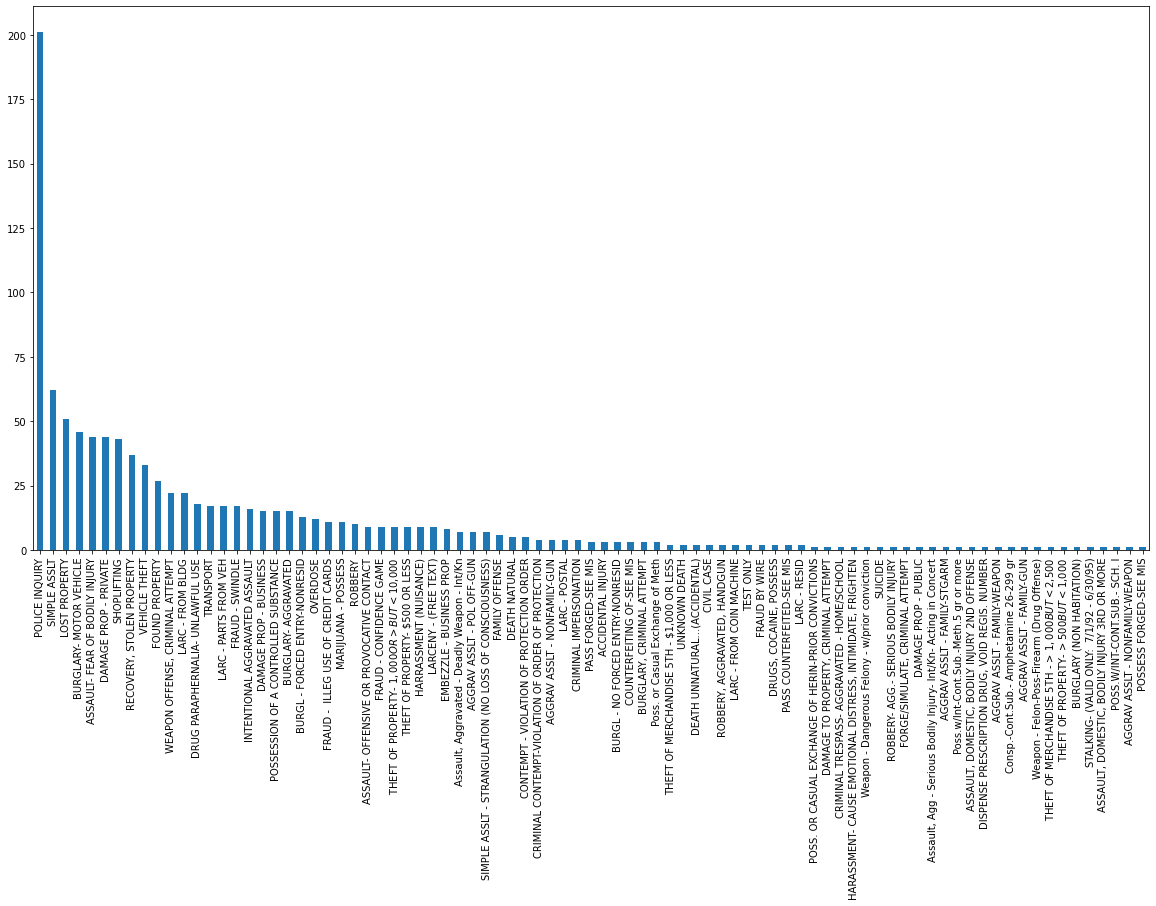

In [16]:
incd['offense_description'].value_counts().plot(kind="bar", figsize =(20,10))

In [17]:
incd.loc[incd['offense_description'].str.contains('ASSAULT'),:]

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_number,domestic_related,victim_type,victim_description,mapped_location,victim_gender,victim_race,victim_ethnicity,victim_county_resident,zip_code
21,2021017899211,20210178992,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-03-29T22:00:00.000,2021-03-30T02:39:00.000,335 335,...,1,True,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.765, 36....",F,W,Non-Hispanic,RESIDENT,37207.0
22,2021017919211,20210179192,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-03-30T03:00:00.000,2021-03-30T03:15:00.000,333 333,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.713, 36....",F,W,Non-Hispanic,RESIDENT,37115.0
80,2021017985911,20210179859,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2021-03-30T09:06:00.000,2021-03-30T10:37:00.000,2020 2020,...,1,True,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.781, 36....",F,W,Non-Hispanic,RESIDENT,37204.0
93,2021017998911,20210179989,D,DISPATCHED,O,OPEN,Open,2021-03-25T16:00:00.000,2021-03-30T11:45:00.000,HICKORY HOLLOW LN,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.65, 36.05]}",M,W,Non-Hispanic,NON RESIDENT,NaN
118,2021018018211,20210180182,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2021-03-30T09:00:00.000,2021-03-30T13:10:00.000,1010 1010,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.839, 36....",F,W,Non-Hispanic,RESIDENT,37209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,2021018635111,20210186351,D,DISPATCHED,O,OPEN,Open,2021-04-02T11:40:00.000,2021-04-02T12:10:00.000,GALLATIN PIKE,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.73, 36.21]}",M,B,Non-Hispanic,RESIDENT,NaN
966,2021018644711,20210186447,D,DISPATCHED,O,OPEN,Open,2021-04-02T12:15:00.000,2021-04-02T13:15:00.000,N GALLATIN PIKE,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.7, 36.3]}",M,W,Non-Hispanic,UNKNOWN,NaN
973,2021018645111,20210186451,D,DISPATCHED,O,OPEN,Open,2021-04-01T16:13:00.000,2021-04-02T13:29:00.000,MURFREESBORO PIKE,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.63, 36.07]}",M,W,Non-Hispanic,RESIDENT,NaN
980,2021018650311,20210186503,D,DISPATCHED,O,OPEN,Open,2021-04-02T13:00:00.000,2021-04-02T13:54:00.000,N GALLATIN PIKE,...,1,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.69, 36.31]}",M,W,Non-Hispanic,RESIDENT,NaN


In [18]:
incd.loc[incd['offense_description'].str.contains('ASSAULT'),:].shape[0]

71

In [19]:
#incd_6months['offense_description'].value_counts(normalize=True)

In [20]:
! conda env list

# conda environments:
#
base                     C:\Users\U6033919\Anaconda3
geospatial            *  C:\Users\U6033919\Anaconda3\envs\geospatial



In [21]:
import geopandas as gpd


In [22]:
census_tract=gpd.read_file('../tl_2019_47_tract/')

In [23]:
census_tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,47,165,020300,47165020300,203,Census Tract 203,G5020,S,14629292,0,+36.5796910,-086.5114955,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,47,165,020902,47165020902,209.02,Census Tract 209.02,G5020,S,9756715,0,+36.3724350,-086.4411274,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,47,165,020800,47165020800,208,Census Tract 208,G5020,S,10235406,37743,+36.4005117,-086.4528100,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."


In [24]:
type(census_tract)

geopandas.geodataframe.GeoDataFrame

In [25]:
incd=incd.dropna(subset=['longitude', 'latitude'])



In [26]:
incd['geometry'] = incd.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
incd.head(3)

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,domestic_related,victim_type,victim_description,mapped_location,victim_gender,victim_race,victim_ethnicity,victim_county_resident,zip_code,geometry
0,2021017901611,20210179016,D,DISPATCHED,O,OPEN,Open,2021-03-29T02:13:00.000,2021-03-30T00:07:00.000,DEMONBREUN ST,...,False,B,BUSINESS,"{'type': 'Point', 'coordinates': [-86.77, 36.16]}",NaN,NaN,NaN,NaN,NaN,POINT (-86.77 36.16)
1,2021017898011,20210178980,D,DISPATCHED,O,OPEN,Open,2021-03-29T14:00:00.000,2021-03-30T00:25:00.000,S 5TH ST,...,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.76, 36.17]}",M,B,Non-Hispanic,RESIDENT,NaN,POINT (-86.76000000000001 36.17)
2,2021017898022,20210178980,D,DISPATCHED,O,OPEN,Open,2021-03-29T14:00:00.000,2021-03-30T00:25:00.000,S 5TH ST,...,False,S,SOCIETY,"{'type': 'Point', 'coordinates': [-86.76, 36.17]}",NaN,NaN,NaN,NaN,NaN,POINT (-86.76000000000001 36.17)


<AxesSubplot:>

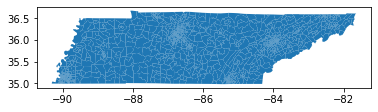

In [27]:
census_tract.plot()

In [28]:
census_tract.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
incd_census=gpd.GeoDataFrame(incd, crs=census_tract.crs, geometry = census_tract['geometry'] )

In [30]:
off_type_assualt=incd.loc[incd['offense_description'].str.contains('ASSAULT'),:]

In [33]:
off_type_assualt['geometry'] = incd.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
off_type_assualt.head(3)

C:\Users\U6033919\AppData\Local\Temp/ipykernel_4296/381195103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_type_assualt['geometry'] = incd.apply(lambda x: Point((x.longitude,


,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,domestic_related,victim_type,victim_description,mapped_location,victim_gender,victim_race,victim_ethnicity,victim_county_resident,zip_code,geometry
21,2021017899211,20210178992,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-03-29T22:00:00.000,2021-03-30T02:39:00.000,335 335,...,True,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.765, 36....",F,W,Non-Hispanic,RESIDENT,37207.0,POINT (-86.765 36.201)
22,2021017919211,20210179192,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2021-03-30T03:00:00.000,2021-03-30T03:15:00.000,333 333,...,False,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.713, 36....",F,W,Non-Hispanic,RESIDENT,37115.0,POINT (-86.71299999999999 36.26)
80,2021017985911,20210179859,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2021-03-30T09:06:00.000,2021-03-30T10:37:00.000,2020 2020,...,True,I,INDIVIDUAL (18 AND OVER),"{'type': 'Point', 'coordinates': [-86.781, 36....",F,W,Non-Hispanic,RESIDENT,37204.0,POINT (-86.78100000000001 36.133)


In [34]:
off_type_assualt=gpd.GeoDataFrame(off_type_assualt, crs=census_tract.crs, geometry = census_tract['geometry'] )

In [35]:
type(off_type_assualt)

geopandas.geodataframe.GeoDataFrame

In [36]:
off_type_assualt=off_type_assualt[['offense_description','incident_occurred','geometry']]

In [37]:
off_type_census=gpd.sjoin(off_type_assualt, census_tract, op = 'within')

In [38]:
off_type_census.head()

,offense_description,incident_occurred,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
21,ASSAULT- FEAR OF BODILY INJURY,2021-03-29T22:00:00.000,"POLYGON ((-82.41380 36.37062, -82.41376 36.370...",21,47,179,061300,47179061300,613,Census Tract 613,G5020,S,19027729,532808,+36.3756444,-082.3807442
22,ASSAULT- FEAR OF BODILY INJURY,2021-03-30T03:00:00.000,"POLYGON ((-82.37459 36.34595, -82.37453 36.346...",22,47,179,061100,47179061100,611,Census Tract 611,G5020,S,6470329,0,+36.3433340,-082.3548145
80,ASSAULT- FEAR OF BODILY INJURY,2021-03-30T09:06:00.000,"POLYGON ((-85.20740 35.20279, -85.20730 35.203...",80,47,065,010412,47065010412,104.12,Census Tract 104.12,G5020,S,11405998,0,+35.1991250,-085.1826664
93,ASSAULT- FEAR OF BODILY INJURY,2021-03-25T16:00:00.000,"POLYGON ((-86.61515 36.31084, -86.61459 36.311...",93,47,165,021205,47165021205,212.05,Census Tract 212.05,G5020,S,7057895,454063,+36.3072945,-086.5988907
118,ASSAULT- FEAR OF BODILY INJURY,2021-03-30T09:00:00.000,"POLYGON ((-86.82119 36.01639, -86.82119 36.016...",118,47,187,050304,47187050304,503.04,Census Tract 503.04,G5020,S,7000284,30885,+36.0276458,-086.8024746


In [39]:
off_type_census['NAMELSAD'].value_counts()

Census Tract 613       1
Census Tract 156.19    1
Census Tract 189.02    1
Census Tract 184.01    1
Census Tract 161       1
                      ..
Census Tract 107.10    1
Census Tract 108.10    1
Census Tract 108.20    1
Census Tract 62.06     1
Census Tract 9608      1
Name: NAMELSAD, Length: 70, dtype: int64

NameError: name 'STATEFP' is not defined

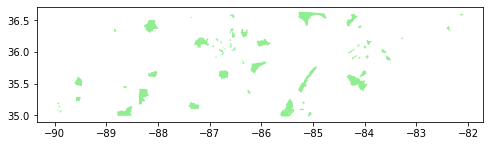

In [40]:
#fig, ax = matplotlib.subplots()
ax = off_type_census.plot(figsize = (8, 10), color = 'lightgreen')
census_tract[census_tract[STATEFP]==47].plot( ax=ax);
plt.show();

In [ ]:
census_tract.head()